Nama Anggota Kelompok :
1. Dian Ekapratiwi (20/459262/PA/19923)
2. Hanifa Mahira (20/462183/PA/20155)
3. Nauval Dwi Primadya (22/507285/NPA/19784)
4. Syuhra Putri Ganiswari (22/507327/NPA/19811)
5. Ifta Mu'izana (22/507333/NPA/19813)

Kelas : KOMA

Mata Kuliah : Pembelajaran Mesin Mendalam (Deep Learning)

memunculkan reprosesion point atau presision recall
epoch ditambah >10

In [ ]:
!pip install -q Kaggle

### Download Dataset

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle               # membuat folder .kaggle di root
!mv kaggle.json ~/.kaggle         # memindahkan file kaggle.json ke folder ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json  # merubah permission file kaggle.json

In [ ]:
!kaggle datasets download -d kamaruladha/mental-disorders-identification-reddit-nlp

 89% 185M/208M [00:04<00:00, 53.4MB/s]
100% 208M/208M [00:04<00:00, 50.4MB/s]


In [ ]:
!unzip mental-disorders-identification-reddit-nlp.zip

Archive:  mental-disorders-identification-reddit-nlp.zip
  inflating: mental_disorders_reddit.csv  


### Read Kaggle Dataset

In [ ]:
import pandas as pd

dataset = pd.read_csv('mental_disorders_reddit.csv')
dataset.iloc[350000:350005]

,title,selftext,created_utc,over_18,subreddit
350000,Is it normal to have a wave of depression for ...,"There are no specific reasons to be depressed,...",1654534947,False,depression
350001,why I can't get rid of this sadness,Why there is always a sad feeling that stays w...,1654534917,False,depression
350002,My life sucks all I do is stay in the house al...,My life sucks I'm about to be 21 in a few week...,1654534871,False,depression
350003,"It's not sadness, it's just being tired of the...","Depression is a weird little thing. At first,...",1654534533,False,depression
350004,How depression feels to me,Imagine being in a dimly lit room. Not trapped...,1654534495,False,depression


# Text Classification Transformer Models

In [ ]:
print(dataset.shape) # 701787 data, 5 kolom

(701787, 5)


In [ ]:
dataset.isnull().sum() # Count NaN

title             46
selftext       33691
created_utc        0
over_18            0
subreddit          0
dtype: int64

In [ ]:
dataset = dataset.dropna(how='any')   # Drop NaN

In [ ]:
dataset['subreddit'].value_counts()   # Count each values of subreddit' and visualize them

BPD              233119
Anxiety          167032
depression       156708
bipolar           46666
mentalillness     44249
schizophrenia     20280
Name: subreddit, dtype: int64

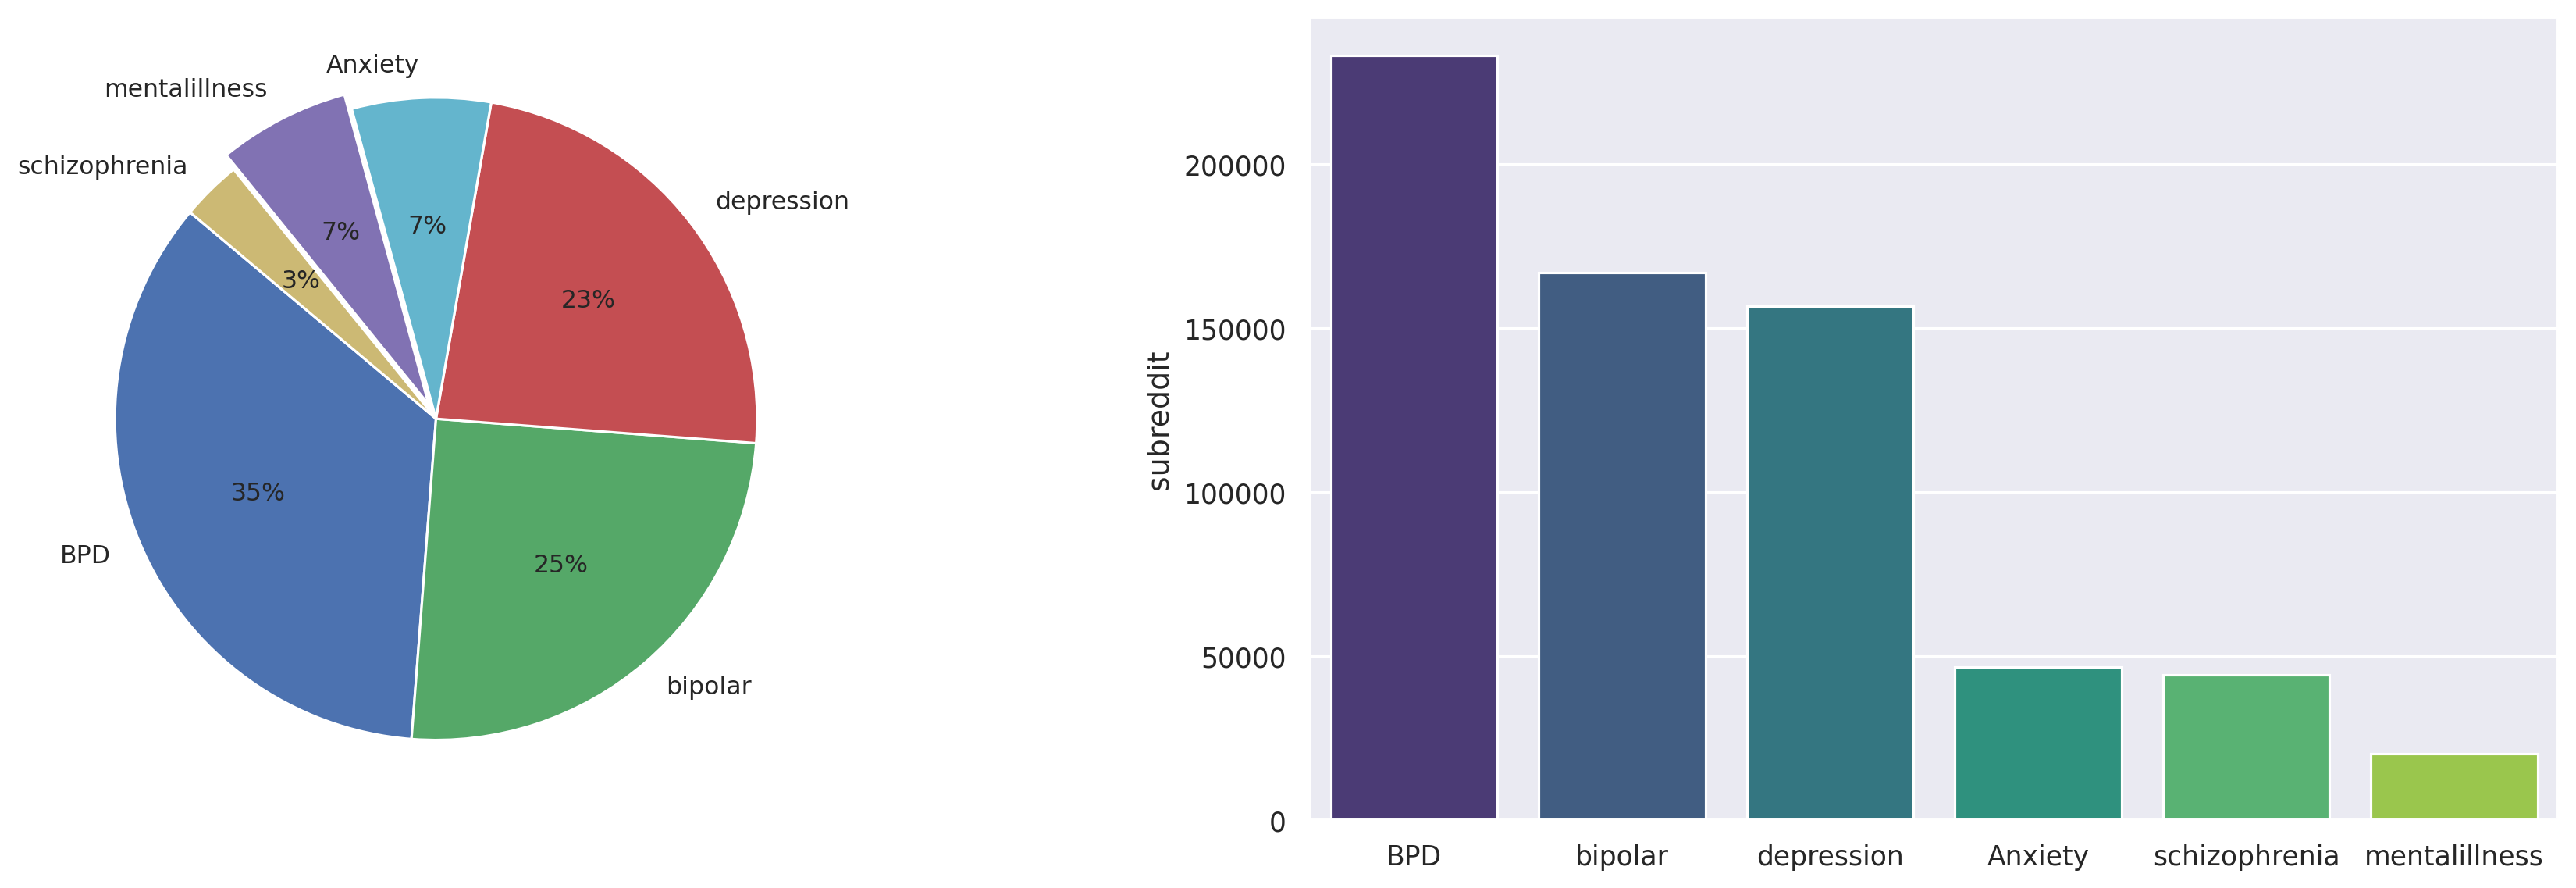

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

labels =['BPD', 'bipolar', 'depression', 'Anxiety', 'mentalillness','schizophrenia']
sizes = [233119, 167032, 156708,  46666,  44249, 20280]
custom_colours = ['b', 'g','r','c','m','y']

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, textprops={'fontsize': 10}, startangle=140,
       autopct='%1.0f%%', colors=custom_colours, explode=[0,0,0,0,0.05,0])

plt.subplot(1, 2, 2)
sns.barplot(x = dataset['subreddit'].unique(), y = dataset['subreddit'].value_counts(), palette= 'viridis')

plt.show()

### Subset the Dataset

In [ ]:
# dataset = dataset['title','selftext','subreddit']

# subset dataset 5% dari data asli : 35.089
# BPD : 12.281
# Bipolar : 8.772
# Deppression : 8.070
# Anxiety : 2.456
# Mental Illness : 2.456
# scizophrenia : 1.052

dataset_subset_BPD = dataset.loc[0:12280]
dataset_subset_Anxiety = dataset.loc[233118:235574]
dataset_subset_Deppression = dataset.loc[400150:408220]
dataset_subset_Bipolar = dataset.loc[556857:565628]
dataset_subset_Mental_ill = dataset.loc[699330:701786]

dataset_subset = pd.concat([dataset_subset_BPD,dataset_subset_Anxiety,dataset_subset_Deppression,dataset_subset_Bipolar,dataset_subset_Mental_ill])

In [ ]:
print(dataset_subset.shape)

(32764, 5)


In [ ]:
dataset_subset['subreddit'].value_counts()

BPD              14450
Anxiety           8508
depression        8064
mentalillness     1742
Name: subreddit, dtype: int64

## Data Preprocessing

### *'title' Preprocessing*

In [ ]:
def convert_lowercase(text):
    text = text.lower()
    return text

dataset_subset['title'] = dataset_subset['title'].apply(convert_lowercase)

dataset_subset.head(5)

,title,selftext,created_utc,over_18,subreddit
0,life is so pointless without others,Does anyone else think the most important part...,1650356960,False,BPD
1,cold rage?,Hello fellow friends 😄\n\nI'm on the BPD spect...,1650356660,False,BPD
2,i don’t know who i am,My [F20] bf [M20] told me today (after I said ...,1650355379,False,BPD
3,help! opinions! advice!,"Okay, I’m about to open up about many things I...",1650353430,False,BPD
4,help,[removed],1650350907,False,BPD


In [ ]:
import re

def remove_url(text):
    re_url = re.compile('https?://\S+|www\.\S+')
    return re_url.sub('', text)

dataset_subset['title'] = dataset_subset['title'].apply(remove_url)

# dataset.head(5)

In [ ]:
import string

exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

dataset_subset['title'] = dataset_subset['title'].apply(remove_punc)

dataset_subset.head(5)

,title,selftext,created_utc,over_18,subreddit
0,life is so pointless without others,Does anyone else think the most important part...,1650356960,False,BPD
1,cold rage,Hello fellow friends 😄\n\nI'm on the BPD spect...,1650356660,False,BPD
2,i don’t know who i am,My [F20] bf [M20] told me today (after I said ...,1650355379,False,BPD
3,help opinions advice,"Okay, I’m about to open up about many things I...",1650353430,False,BPD
4,help,[removed],1650350907,False,BPD


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

def remove_stopwords(text):
    new_list = []
    words = word_tokenize(text)
    stopwrds = stopwords.words('english')
    for word in words:
        if word not in stopwrds:
            new_list.append(word)
    return ' '.join(new_list)

dataset_subset['title'] = dataset_subset['title'].apply(remove_stopwords)

In [ ]:
dataset_subset.head(5)

,title,selftext,created_utc,over_18,subreddit
0,life pointless without others,Does anyone else think the most important part...,1650356960,False,BPD
1,cold rage,Hello fellow friends 😄\n\nI'm on the BPD spect...,1650356660,False,BPD
2,’ know,My [F20] bf [M20] told me today (after I said ...,1650355379,False,BPD
3,help opinions advice,"Okay, I’m about to open up about many things I...",1650353430,False,BPD
4,help,[removed],1650350907,False,BPD


In [ ]:
# import numpy as np

# dataset_subset['Total Title After Transformation'] = dataset_subset['title'].apply(lambda x: np.log(len(x.split())))

In [ ]:
dataset_subset.head(5)

,title,selftext,created_utc,over_18,subreddit
0,life pointless without others,Does anyone else think the most important part...,1650356960,False,BPD
1,cold rage,Hello fellow friends 😄\n\nI'm on the BPD spect...,1650356660,False,BPD
2,’ know,My [F20] bf [M20] told me today (after I said ...,1650355379,False,BPD
3,help opinions advice,"Okay, I’m about to open up about many things I...",1650353430,False,BPD
4,help,[removed],1650350907,False,BPD


### *'selftext' preprocessing*

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
def convert_lowercase(text):
    text = text.lower()
    return text

dataset_subset['selftext'] = dataset_subset['selftext'].apply(convert_lowercase)

In [ ]:
def remove_url(text):
    re_url = re.compile('https?://\S+|www\.\S+')
    return re_url.sub('', text)

dataset_subset['selftext'] = dataset_subset['selftext'].apply(remove_url)

In [ ]:
exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

dataset_subset['selftext'] = dataset_subset['selftext'].apply(remove_punc)

In [ ]:
def remove_stopwords(text):
    new_list = []
    words = word_tokenize(text)
    stopwrds = stopwords.words('english')
    for word in words:
        if word not in stopwrds:
            new_list.append(word)
    return ' '.join(new_list)

dataset_subset['selftext'] = dataset_subset['selftext'].apply(remove_stopwords)

In [ ]:
from nltk.stem import PorterStemmer

def perform_stemming(text):
    stemmer = PorterStemmer()
    new_list = []
    words = word_tokenize(text)
    for word in words:
        new_list.append(stemmer.stem(word))

    return " ".join(new_list)

dataset_subset['selftext'] = dataset_subset['selftext'].apply(perform_stemming)

In [ ]:
dataset_subset.head(5)

,title,selftext,created_utc,over_18,subreddit
0,life pointless without others,anyon els think import part life relationship ...,1650356960,False,BPD
1,cold rage,hello fellow friend 😄 im bpd spectrum discoura...,1650356660,False,BPD
2,’ know,f20 bf m20 told today said “ wish could better...,1650355379,False,BPD
3,help opinions advice,okay ’ open mani thing ’ done past ’ proud ’ p...,1650353430,False,BPD
4,help,remov,1650350907,False,BPD


In [ ]:
# dataset_subset.to_csv('dataset_prepocessing.csv')

In [ ]:
# from google.colab import files
# files.download("dataset_prepocessing.csv")


## Percobaan 1

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 7.1 MB/s 
     |████████████████████████████████| 182 kB 81.4 MB/s 
     |████████████████████████████████| 7.6 MB 56.9 MB/s 


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split


import tensorflow as tf
import tensorflow.keras.layers as L
import tensorflow.keras.backend as K
from tensorflow.keras import optimizers, losses, Model, utils, callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from transformers import TFAutoModelForSequenceClassification, TFAutoModel, AutoTokenizer

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset_subset["selftext"]
y = dataset_subset['subreddit'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify = y)

y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [ ]:
len(X_train)

26211

In [ ]:
len(X_test)

6553

In [ ]:
# seq_len = 512
# batch_size = 8
# transformer = 'distilroberta-base'
# tokenizer = AutoTokenizer.from_pretrained(transformer)
# encoder = TFAutoModel.from_pretrained(transformer)

# input_ids = L.Input(shape=(seq_len,), dtype=tf.int32, name='input_ids')
# input_attention_mask = L.Input(shape=(seq_len,), dtype=tf.int32, name='attention_mask')

# embeddings = encoder.roberta([input_ids, input_attention_mask])[0]
# pooled = L.GlobalAveragePooling1D()(embeddings)
# outputs = L.Dense(20)(pooled)

# model = Model(inputs=[input_ids, input_attention_mask], outputs=outputs)
# model.compile(optimizer=optimizers.Adam(lr=1e-5), loss=losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
# model.summary()

In [ ]:
# tokenized_inputs_train = tokenizer(
#     X_train.values.tolist(), max_length=seq_len, truncation=True, padding='max_length', return_tensors='tf'
# )
# tokenized_inputs_valid = tokenizer(
#     X_test.values.tolist(), max_length=seq_len, truncation=True, padding='max_length', return_tensors='tf'
# )

In [ ]:
# train_dataset = tf.data.Dataset.from_tensor_slices((dict(tokenized_inputs_train), list(y_train.values)))
# test_dataset = tf.data.Dataset.from_tensor_slices((dict(tokenized_inputs_valid), list(y_test.values)))

In [ ]:
# rlp = callbacks.ReduceLROnPlateau(monitor='val_loss', patience=1, verbose=1, factor=0.01)
# es = callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True, min_delta=1e-4)

# history = model.fit(
#     train_dataset.shuffle(1024, seed=19).batch(batch_size), validation_data=test_dataset.shuffle(1024, seed=19).batch(batch_size),
#     batch_size=batch_size, callbacks=[rlp, es], epochs=20
# ).history

###TF-IDF (belum tau hasilnya kek gimana -h, update, coba run malah crash terus:))

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# def tf_idf(text):
#   vectorizer = TfidfVectorizer()
#   vectors = vectorizer.fit_transform(text)
#   feature_names = vectorizer.get_feature_names()
#   dense = vectors.todense()
#   denselist = dense.tolist()
#   return denselist, feature_names

# denselist_train, vocab_X_train = tf_idf(X_train)
# denselist_test, vocab_X_test = tf_idf(X_test)
# df = pd.DataFrame(denselist_train, columns=vocab_X_train)
# df = pd.DataFrame(denselist_test, columns=vocab_X_test)

###Transformers using PyTorch (belum tau hasilnya kek gimana -h)

In [ ]:
# !pip install pytorch-transformers

In [ ]:
# import torch
# from pytorch_transformers import GPT2Tokenizer, GPT2LMHeadModel

# # Load pre-trained model tokenizer (vocabulary)
# tokenizer = GPT2Tokenizer.from_pretrained(vocab_X_train)

# # Encode a text inputs
# indexed_tokens = tokenizer.encode(X_test)

# # Convert indexed tokens in a PyTorch tensor
# tokens_tensor = torch.tensor(indexed_tokens)

# # Load pre-trained model (weights)
# model = GPT2LMHeadModel.from_pretrained(y)

# # Set the model in evaluation mode to deactivate the DropOut modules
# model.eval()

# # If you have a GPU, put everything on cuda
# tokens_tensor = tokens_tensor.to('cuda')
# model.to('cuda')

# # Predict all tokens
# with torch.no_grad():
#     outputs = model(tokens_tensor)
#     predictions = outputs[0]

# # Get the predicted next sub-word
# predicted_index = torch.argmax(predictions[0, -1, :]).item()
# predicted_text = tokenizer.decode([indexed_tokens] + [predicted_index])

# # Print the predicted word
# print(predicted_text)

## Percobaan 3

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import re
import seaborn as sns
import tensorflow as tf
import transformers

In [ ]:
dataset_subset.replace(to_replace='BPD', value=0, inplace=True)
dataset_subset.replace(to_replace='Anxiety', value=1, inplace=True)
dataset_subset.replace(to_replace='depression', value=2, inplace=True)
dataset_subset.replace(to_replace='mentalillness', value=3, inplace=True)
dataset_subset = dataset_subset[['selftext', 'subreddit']]
dataset_subset.head()

,selftext,subreddit
0,anyon els think import part life relationship ...,0
1,hello fellow friend 😄 im bpd spectrum discoura...,0
2,f20 bf m20 told today said “ wish could better...,0
3,okay ’ open mani thing ’ done past ’ proud ’ p...,0
4,remov,0


In [ ]:
raw_dataset_subset = dataset_subset.copy()

In [ ]:
def text_preprocessing(text):
  text = text.lower() #lowercase
  text = re.sub(r'#.+','', text) #menghapus tag
  text = re.sub(r'https?://\S+','', text) #menghapus url
  text = re.sub(r'[-+]?[0-9]+','', text) #mennghapus angka
  text = re.sub(r'[^\w\s]','', text) #menghapus tanda baca
  text = text.strip()
  return text

In [ ]:
dataset_subset['selftext'] = dataset_subset['selftext'].apply(text_preprocessing)
dataset_subset.head()

,selftext,subreddit
0,anyon els think import part life relationship ...,0
1,hello fellow friend im bpd spectrum discourag...,0
2,f bf m told today said wish could better lik...,0
3,okay open mani thing done past proud perso...,0
4,remov,0


In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(dataset_subset, test_size=0.2, random_state=0)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=0)
df_train.shape, df_test.shape, df_val.shape

((26211, 2), (3277, 2), (3276, 2))

In [ ]:
from transformers import BertTokenizer

bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
vocabulary = bert_tokenizer.get_vocab()
print('panjang vocab: ', len(vocabulary))
print(vocabulary)

panjang vocab:  30522
{'[PAD]': 0, '[unused0]': 1, '[unused1]': 2, '[unused2]': 3, '[unused3]': 4, '[unused4]': 5, '[unused5]': 6, '[unused6]': 7, '[unused7]': 8, '[unused8]': 9, '[unused9]': 10, '[unused10]': 11, '[unused11]': 12, '[unused12]': 13, '[unused13]': 14, '[unused14]': 15, '[unused15]': 16, '[unused16]': 17, '[unused17]': 18, '[unused18]': 19, '[unused19]': 20, '[unused20]': 21, '[unused21]': 22, '[unused22]': 23, '[unused23]': 24, '[unused24]': 25, '[unused25]': 26, '[unused26]': 27, '[unused27]': 28, '[unused28]': 29, '[unused29]': 30, '[unused30]': 31, '[unused31]': 32, '[unused32]': 33, '[unused33]': 34, '[unused34]': 35, '[unused35]': 36, '[unused36]': 37, '[unused37]': 38, '[unused38]': 39, '[unused39]': 40, '[unused40]': 41, '[unused41]': 42, '[unused42]': 43, '[unused43]': 44, '[unused44]': 45, '[unused45]': 46, '[unused46]': 47, '[unused47]': 48, '[unused48]': 49, '[unused49]': 50, '[unused50]': 51, '[unused51]': 52, '[unused52]': 53, '[unused53]': 54, '[unused54]'

In [ ]:
print('kalimat: ', raw_dataset_subset['selftext'][1])
print('Bert tokenizer: ', bert_tokenizer.tokenize(dataset_subset['selftext'][1]))

kalimat:  hello fellow friend 😄 im bpd spectrum discourag silent borderlin characterist differ level experienc anger wonder express what healthi way found cool first becom silent blame mayb mayb he today mayb simpli dont get due shortcom understand howev find interest someon hurt one love tend demon extend would normal rather aggressor extrem case lead maximum express anger dont know whether guy get experi well written reaction anoth post illustr anger would look like maximum amount rage like blackout call cold rage sens pain whatsoev pure anger point peopl dont recogn anymor dissoci anger field view becom pinpoint start breath superfici even lash one love tri calm disgust insan must say happen life ex sister encourag mix psych med drug alcohol went deep psychot state first time life didnt even let us know happen sister came home state call told she complet bonker instead alarm rest famili im shake im write know still rest anger insid left behind first time thought could end someon lif

Token indices sequence length is longer than the specified maximum sequence length for this model (715 > 512). Running this sequence through the model will result in indexing errors


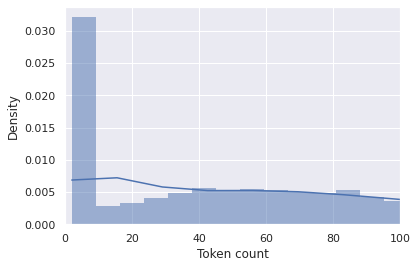

In [ ]:
token_lens = []
for txt in dataset_subset['selftext']:
  tokens = bert_tokenizer.encode(txt)
  token_lens.append(len(tokens))
sns.histplot(token_lens, kde = True, stat='density', linewidth = 0)
plt.xlim([0, 100]);
plt.xlabel('Token count');

In [ ]:
def convert_example_to_feature(sentence):
  return bert_tokenizer.encode_plus(
      sentence,
      add_special_tokens = True,
      padding = 'max_length',
      truncation = 'longest_first',
      max_length = 42,
      return_attention_mask = True,
      return_token_type_ids = True
  )

In [ ]:
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      "input_ids": input_ids,
      "token_type_ids": token_type_ids,
      "attention_mask": attention_masks,
  }, label

In [ ]:
def encode(data):
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []

  for sentence, label in data.to_numpy():
    bert_input = convert_example_to_feature(sentence)
    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    label_list.append([label])
  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)

In [ ]:
train_encoded = encode(df_train).batch(32)
test_encoded = encode(df_test).batch(32)
val_encoded = encode(df_val).batch(32)

In [ ]:
from transformers import TFBertForSequenceClassification

bert_model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels = 5)

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
bert_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00003),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
)

In [ ]:
callback_ES = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy',
    min_delta=0.05,
    patience=2,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [ ]:
bert_history = bert_model.fit(train_encoded, epochs = 18,
                              batch_size = 32,
                              validation_data = val_encoded,
                              callbacks=[callback_ES])

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [ ]:
plot_graphs(bert_history, 'accuracy')
plot_graphs(bert_history, 'loss')

# Judul

In [ ]:
print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(3):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, bert_history.history['accuracy'][i], bert_history.history['loss'][i], bert_history.history['val_accuracy'][i], bert_history.history['val_loss'][i]))

In [ ]:
bert_model.save_weights('bert-model.h5')

In [ ]:
score = bert_model.evaluate(test_encoded)
print("Test Accuracy: ", score[1])

In [ ]:
score

In [ ]:
predicted_raw = bert_model.predict(test_encoded)

In [ ]:
y_pred = np.argmax(predicted_raw['logits'], axis=1)
y_true = np.array(df_test['subreddit'])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

accuracy_score(y_true, y_pred)

In [ ]:
confusion_matrix(y_true, y_pred)

In [ ]:
print(classification_report(y_true, y_pred))

In [ ]:
bert_load_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels = 5)
bert_load_model.load_weights('bert-model.h5')

In [ ]:
print(dataset_subset['selftext'].iloc[26000])

In [ ]:
input_text = dataset_subset['selftext'].iloc[1]

input_text_tokenized = bert_tokenizer.encode(input_text,
                                             truncation = True,
                                             padding = 'max_length',
                                             return_tensors = 'tf')

In [ ]:
bert_predict = bert_load_model(input_text_tokenized)
bert_output = tf.nn.softmax(bert_predict[0], axis = -1)

In [ ]:
mental_illness_label = ['BPD', 'Anxiety', 'depression', 'mentalillness']
label = tf.argmax(bert_output, axis = 1)
label = label.numpy()

In [ ]:
print("Input text : ",input_text,'\n', "label : ", mental_illness_label[label[0]])